In [240]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold

In [241]:
train = pd.read_csv('Train.csv')
print(train.shape)
train.head()

(9146, 10)


,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [242]:
test = pd.read_csv('Test.csv')
print(test.shape)
test.head()

(36584, 9)


,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
0,4946.44,914.06,0.18479,54.5566,6.628345e+05,67.0525,2301.76,22,41.9554
1,5613.85,1629.12,0.29019,51.5524,7.842271e+05,80.1986,3235.00,48,40.7410
2,12421.10,3062.41,0.24654,154.1560,1.763575e+06,186.8590,4684.63,63,29.4778
3,6830.77,2457.66,0.35979,56.8995,9.296623e+05,92.7361,3211.93,42,38.5027
4,33407.80,12353.60,0.36978,219.0740,4.595871e+06,493.3370,13389.36,187,26.8449


In [4]:
print('Train:\n', train.isna().sum(), '\n\n')
print('Test:\n', test.isna().sum())

Train:
 mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
tumor_size        0
dtype: int64 


Test:
 mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
dtype: int64


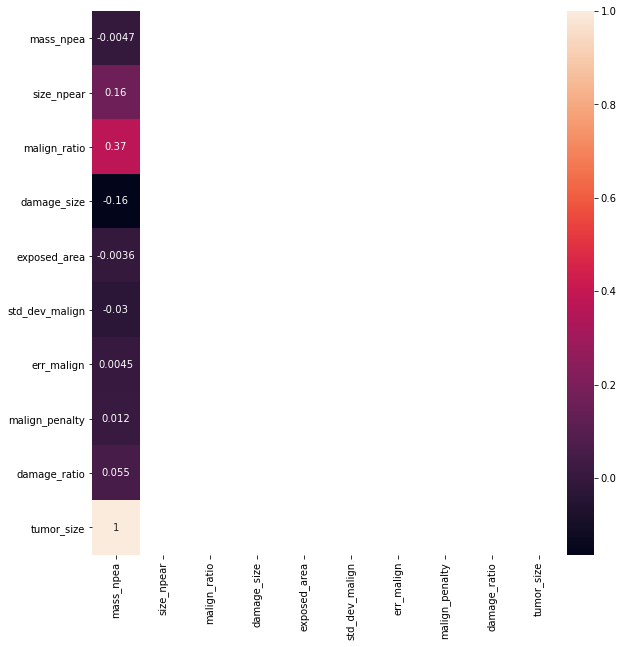

In [19]:
fig, ax = plt.subplots(figsize=(10,10))

corr = train.corr()[['tumor_size']]

# plot the heatmap
sns.heatmap(corr, xticklabels=train.columns, yticklabels=train.columns, annot=True, ax=ax)

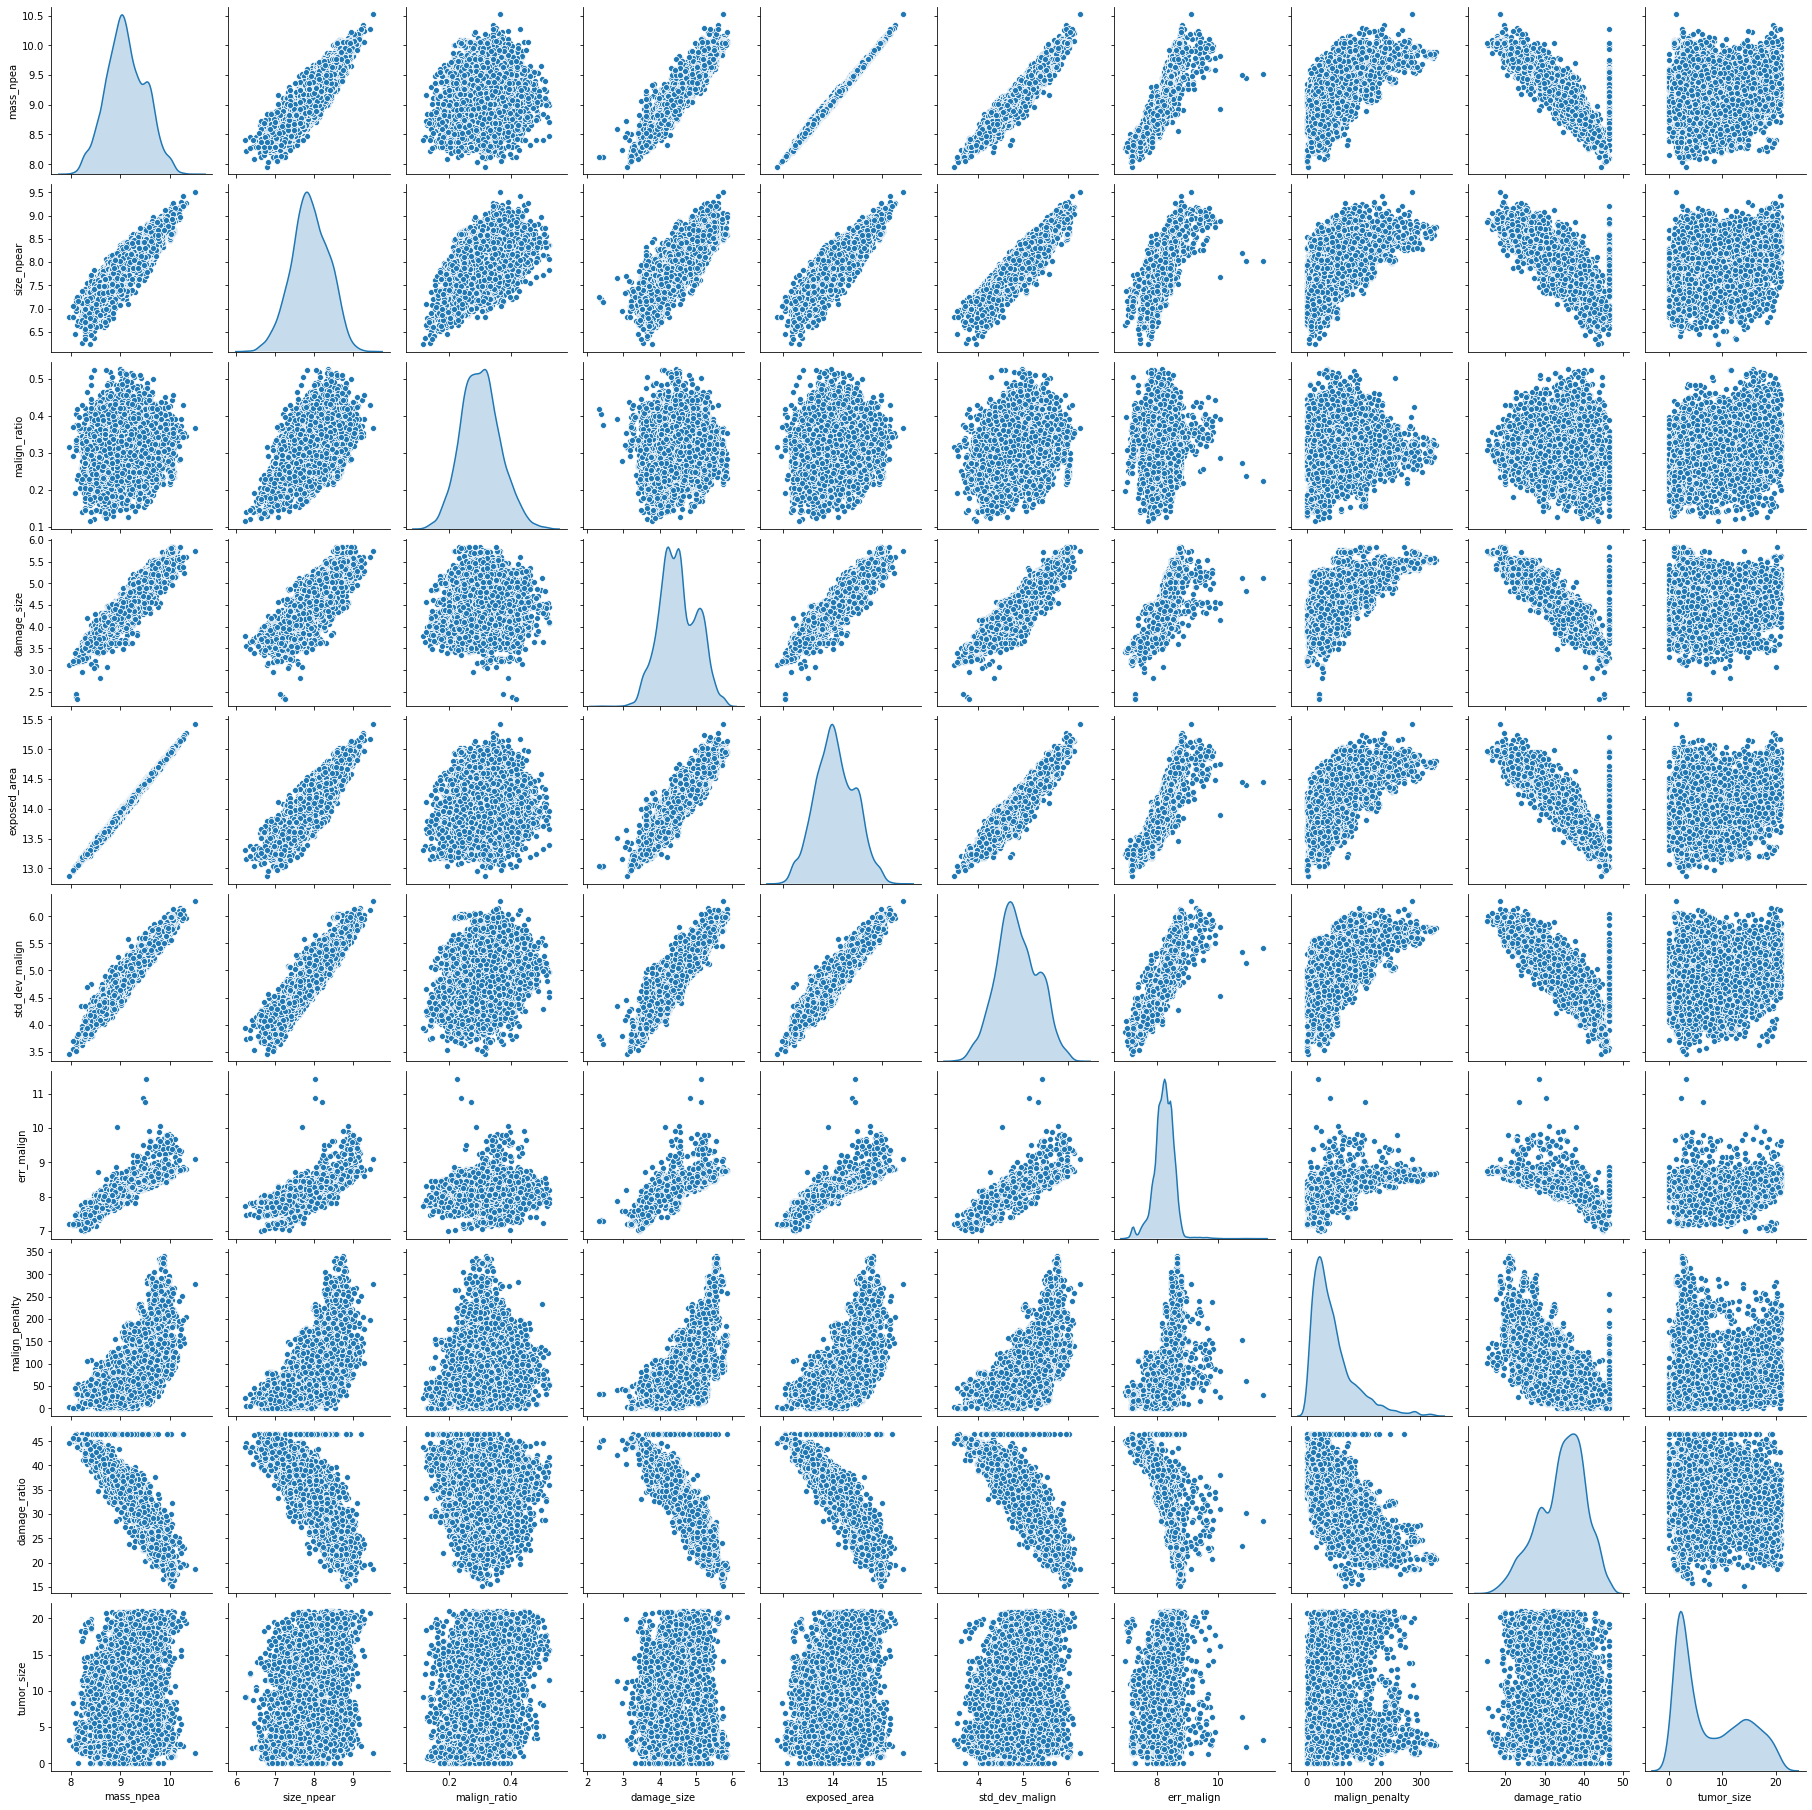

In [189]:
sns.pairplot(train, diag_kind='kde')

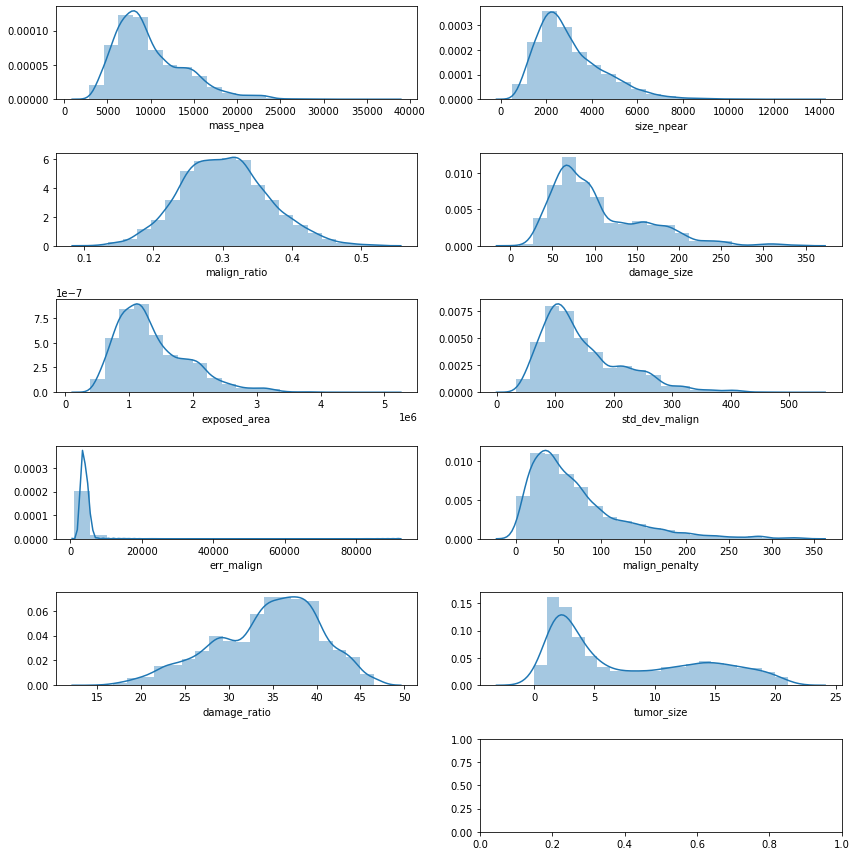

In [23]:
fig, ax = plt.subplots(nrows=6, ncols=2,figsize=(12,12))
ax = ax.flatten()
i=0
for feat in list(train.columns):
    sns.distplot(a=train[feat],bins=20,ax=ax[i])
    i+=1
fig.delaxes(ax[10])
fig.tight_layout()

In [62]:
train.describe()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
count,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000
mean,9.122697,7.906964,-1.215750,4.513548,14.053139,4.878495,8.238414,-inf,3.523246,-inf
std,0.392687,0.473793,0.212786,0.507621,0.395966,0.461635,0.320096,NaN,0.187507,NaN
min,7.960240,6.235449,-2.164390,2.333124,12.868383,3.464810,6.993190,-inf,2.723136,-inf
25%,8.852010,7.592698,-1.350725,4.159079,13.774363,4.562825,8.063907,3.433987,3.410825,0.841567
50%,9.093353,7.895186,-1.200462,4.482531,14.028246,4.837381,8.254872,3.988984,3.562345,1.621465
75%,9.402608,8.250815,-1.070018,4.899398,14.342062,5.205388,8.447753,4.510860,3.658577,2.590467
max,10.518549,9.513034,-0.643786,5.847652,15.420663,6.270780,11.429367,5.828946,3.840450,3.044475


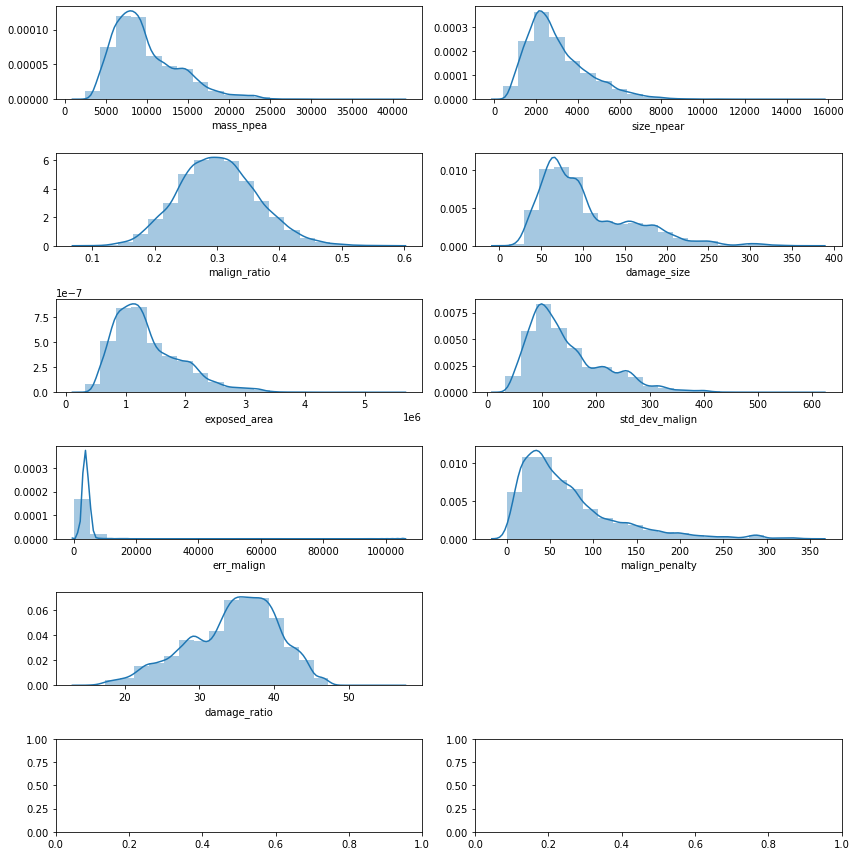

In [26]:
fig, ax = plt.subplots(nrows=6, ncols=2,figsize=(12,12))
ax = ax.flatten()
i=0
for feat in list(test.columns):
    sns.distplot(a=test[feat],bins=20,ax=ax[i])
    i+=1
fig.delaxes(ax[9])
fig.tight_layout()

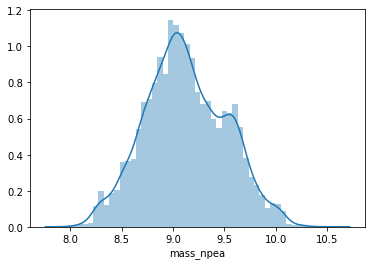

In [55]:
# check the outliers
sns.distplot(np.log(train.mass_npea))

# transformation

In [243]:
train.mass_npea=np.sqrt(train.mass_npea)
test.mass_npea=np.sqrt(test.mass_npea)

train.size_npear=np.log1p(train.size_npear)
test.size_npear=np.log1p(test.size_npear)

train.malign_ratio=np.log1p(train.malign_ratio)
test.malign_ratio=np.log1p(test.malign_ratio)

train.damage_size=np.sqrt(train.damage_size)
test.damage_size=np.sqrt(test.damage_size)

train.exposed_area=np.sqrt(train.exposed_area)
test.exposed_area=np.sqrt(test.exposed_area)

train.std_dev_malign=np.log1p(train.std_dev_malign)
test.std_dev_malign=np.log1p(test.std_dev_malign)

train.malign_penalty=np.sqrt(train.malign_penalty)
test.malign_penalty=np.sqrt(test.malign_penalty)

In [246]:
train.describe()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
count,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000
mean,97.587511,7.907376,0.263586,9.867177,1148.563213,4.886897,3992.936256,7.765133,34.461652,7.723348
std,19.487726,0.473596,0.047857,2.557666,230.760339,0.457909,1780.672859,3.090859,5.972808,6.086852
min,53.523453,6.237406,0.108693,3.210934,622.778775,3.495610,1089.190000,0.000000,15.228000,0.000000
25%,83.596770,7.593202,0.230359,8.000783,979.636291,4.573204,3177.682500,5.567764,30.290225,2.320000
50%,94.318423,7.895559,0.263175,9.405227,1112.230667,4.845277,3846.320000,7.348469,35.245750,5.060500
75%,110.090644,8.251076,0.294908,11.584861,1301.185321,5.210860,4664.577500,9.539392,38.806075,13.336000
max,192.341883,9.513108,0.422191,18.612361,2231.281256,6.272669,91983.700000,18.439089,46.546400,20.999000


In [247]:
test.describe()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
count,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000
mean,97.381639,7.899630,0.262905,9.841114,1146.280512,4.881662,3988.960923,7.762071,34.539167
std,19.507947,0.476249,0.048221,2.557862,230.880326,0.456650,2043.358639,3.123612,5.981472
min,48.908588,6.002652,0.088469,3.331081,565.234656,3.522391,0.000000,0.000000,15.312300
25%,83.220310,7.590250,0.230064,7.965568,975.826630,4.559724,3161.480000,5.567764,30.451775
50%,94.336128,7.887999,0.262318,9.361370,1112.311260,4.845639,3838.820000,7.348469,35.310750
75%,110.125497,8.237092,0.294811,11.554047,1300.173889,5.205510,4638.547500,9.539392,38.880025
max,200.087231,9.636457,0.455962,19.217622,2339.233081,6.395943,105948.170000,18.708287,55.300900


In [ ]:
train['is_train'] = 1
test['is_train'] = 0

t = pd.concat([train.drop(columns=['tumor_size']), test], ignore_index=False)
t.shape, train.shape, test.shape

# feature engineering

In [253]:
t["p/e"]=t.malign_penalty/t.err_malign

t["mass/exposed_area"]=(t.mass_npea/t.exposed_area)

t["mass/std"]=t.mass_npea/t.std_dev_malign

t["error/std"]=t.err_malign/t.std_dev_malign

t["error-penalty"]=t.damage_ratio-t.malign_ratio

In [63]:
train.columns

Index(['mass_npea', 'size_npear', 'malign_ratio', 'damage_size',
       'exposed_area', 'std_dev_malign', 'err_malign', 'malign_penalty',
       'damage_ratio', 'tumor_size'],
      dtype='object')

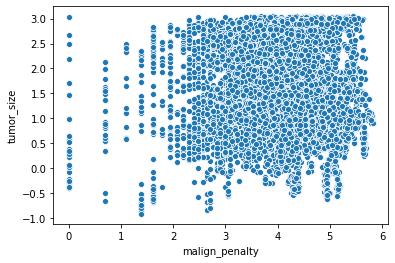

In [78]:
sns.scatterplot(train.malign_penalty, train.tumor_size)

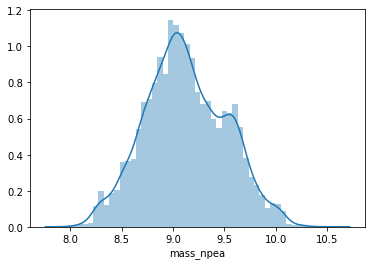

In [61]:
sns.distplot(train.mass_npea)

In [230]:
test = pd.read_csv('Test.csv')
test.describe()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
count,36584.000000,36584.000000,36584.000000,36584.000000,3.658400e+04,36584.000000,36584.000000,36584.000000,36584.000000
mean,9863.733201,3013.502009,0.302219,103.390012,1.367263e+06,145.471517,3988.960923,70.006424,34.539167
std,4057.545455,1464.816338,0.062973,55.417297,5.638794e+05,69.870382,2043.358639,56.669800,5.981472
min,2392.050000,403.500000,0.092500,11.096100,3.194902e+05,32.865300,0.000000,0.000000,15.312300
25%,6925.620000,1977.807500,0.258680,63.450275,9.522376e+05,94.557150,3161.480000,31.000000,30.451775
50%,8899.305000,2664.105000,0.299940,87.635250,1.237236e+06,126.184500,3838.820000,54.000000,35.310750
75%,12127.625000,3777.537500,0.342873,133.496000,1.690452e+06,181.273750,4638.547500,91.000000,38.880025
max,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


# let's do modelling

In [257]:
train_df = t[t.is_train==1]
test_df = t[t.is_train==0]

In [259]:
train_df['tumor_size'] = train.tumor_size

In [260]:
train_df.head(1)

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,is_train,p/e,mass/exposed_area,mass/std,error/std,error-penalty,tumor_size
0,83.252027,7.979346,0.351473,7.199292,994.399018,4.704898,2758.76,8.485281,39.362,1,0.003076,0.083721,17.694758,586.359168,39.010527,14.103


In [261]:
x = train_df.drop(columns=['tumor_size', 'is_train'], axis=1)
y = train_df[['tumor_size']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=50)

In [262]:
gbr = GradientBoostingRegressor(learning_rate=0.1, random_state=99)
gbr.fit(x_train, y_train)
y_pred_gbr = gbr.predict(x_test)

rmse_gbr = np.sqrt(mean_squared_error( y_test, y_pred_gbr ))

print("RMSE for Gradient Boost:", rmse_gbr)
print("R2_square:", r2_score(y_test, y_pred_gbr))

RMSE for Gradient Boost: 4.6132843838858335
R2_square: 0.4287149950648358


In [221]:
from xgboost import XGBRegressor

param_grid = {'max_depth':[4,6],
              'learning_rate': [0.05,0.7,0.1],
              'n_estimators': [200,400, 100]}
xgb_model = XGBRegressor(subsample=1)

grid_search_xgb = GridSearchCV(xgb_model, param_grid=param_grid,cv = 2, n_jobs = 5, verbose=True)
grid_search_xgb.fit(x_train,y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  36 out of  36 | elapsed:   31.2s finished


[00:29:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, estimator=XGBRegressor(), n_jobs=5,
             param_grid={'learning_rate': [0.05, 0.7, 0.1], 'max_depth': [4, 6],
                         'n_estimators': [200, 400, 100]},
             verbose=True)

In [222]:
grid_search_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 400}

In [223]:
params = {'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 0.7,
 'colsample_bytree': 0.7,
 'gamma': 0.01,
 'learning_rate': 0.01,
 'max_depth': 7,
 'min_child_weight': 10,
 'n_estimators': 1000,
 'reg_alpha': 1,
 'reg_lambda': 1,
 'subsample': 1}

xgb_model = xgb.XGBRegressor(**grid_search_xgb.best_params_)

xgb_model.fit(x_train, y_train, eval_metric = "rmse", eval_set = [(x_train, y_train),  (x_test, y_test)], verbose = 1000, early_stopping_rounds=100)
preds_xgb = xgb_model.predict(x_test)
rmse_xgb = np.sqrt(mean_squared_error( y_test, abs(preds_xgb )))
print("RMSE for XGBoost", rmse_xgb)
print("R2_square:", r2_score(y_test, preds_xgb))

[00:29:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.45509	validation_1-rmse:1.45383
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[399]	validation_0-rmse:0.211805	validation_1-rmse:0.49578
RMSE for XGBoost 0.4956198428566678
R2_square: 0.5902139953808452


In [239]:
ens_pred =  preds_xgb*0.3 + preds_lgb*0.7
rmse_ens = np.sqrt(mean_squared_error( y_test, abs(ens_pred )))
print("RMSE for Ensemble", rmse_ens)
print("R2_square for Emsemble:", r2_score(y_test, ens_pred))

RMSE for Ensemble 0.47918521454093416
R2_square for Emsemble: 0.616940207491287


In [263]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=35,
                              learning_rate=0.052, n_estimators=2800,feature_fraction = 0.75,
                              feature_fraction_seed=9,min_data_in_leaf =15 )
model_lgb.fit(x_train,y_train)
preds_lgb = model_lgb.predict(x_test)
rmse_lgb = np.sqrt(mean_squared_error( y_test, abs(preds_lgb )))
print("RMSE for LightGBM", rmse_lgb)
print("R2_square for LightGBM:", r2_score(y_test, preds_lgb))

RMSE for LightGBM 3.897543764557267
R2_square for LightGBM: 0.5920323897956239


In [269]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from lightgbm import LGBMRegressor

bag=BaggingRegressor(n_estimators=150,max_features=13)
lgb=LGBMRegressor(n_estimators=900,num_leaves=48,reg_lambda=50,reg_alpha=20)
etc=ExtraTreesRegressor(n_estimators=400,max_depth=26,min_samples_split=2,max_features=10)

estimators=[("bag",bag),("lgb",lgb),("etc",etc)]

model_ens = StackingRegressor(estimators=estimators)

model_ens.fit(x_train.drop(columns='p/e'),y_train)
preds_ens = model_ens.predict(x_test.drop(columns='p/e'))
rmse_ens = np.sqrt(mean_squared_error( y_test, preds_ens ))
print("RMSE for Ensembling", rmse_ens)
print("R2_square for Ensembling:", r2_score(y_test, preds_ens))

RMSE for Ensembling 3.766582704190734
R2_square for Ensembling: 0.6191733031236355


In [267]:
test_df.describe()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,is_train,p/e,mass/exposed_area,mass/std,error/std,error-penalty
count,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.0,3.658400e+04,36584.000000,36584.000000,36584.000000,36584.000000
mean,97.381639,7.899630,0.262905,9.841114,1146.280512,4.881662,3988.960923,7.762071,34.539167,0.0,inf,0.084986,19.767253,803.683128,34.276261
std,19.507947,0.476249,0.048221,2.557862,230.880326,0.456650,2043.358639,3.123612,5.981472,0.0,NaN,0.001111,2.186680,368.029604,5.985256
min,48.908588,6.002652,0.088469,3.331081,565.234656,3.522391,0.000000,0.000000,15.312300,0.0,0.000000e+00,0.081887,13.702867,0.000000,14.998351
25%,83.220310,7.590250,0.230064,7.965568,975.826630,4.559724,3161.480000,5.567764,30.451775,0.0,1.526180e-03,0.084222,18.197472,687.324214,30.176801
50%,94.336128,7.887999,0.262318,9.361370,1112.311260,4.845639,3838.820000,7.348469,35.310750,0.0,1.957407e-03,0.084885,19.543624,792.248198,35.042542
75%,110.125497,8.237092,0.294811,11.554047,1300.173889,5.205510,4638.547500,9.539392,38.880025,0.0,2.473659e-03,0.085589,21.176142,890.784225,38.615742
max,200.087231,9.636457,0.455962,19.217622,2339.233081,6.395943,105948.170000,18.708287,55.300900,0.0,inf,0.091736,31.283463,20319.600131,54.965257


In [ ]:
pred_test_xgb = xgb_model.predict(test)
pred_test_lgb = model_lgb.predict(test)

ens_pred_test =  pred_test_xgb*0.3 + pred_test_lgb*0.7

In [271]:
preds_ens_test = model_ens.predict(test_df.drop(columns=['is_train','p/e']))

In [272]:
sub = pd.read_csv('sample_submission.csv')
sub.head()
sub['tumor_size'] = preds_ens_test
sub.to_csv('Submit_new1.csv', index=False)